In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [287]:
cust_aquisition = pd.read_csv(r'D:\AnalytxLabs\Python Project\4rth\Customer Acqusition.csv')
cust_aquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [288]:
spend = pd.read_csv(r'D:\AnalytxLabs\Python Project\4rth\spend.csv')
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [289]:
repayment = pd.read_csv(r'D:\AnalytxLabs\Python Project\4rth\Repayment.csv')
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [290]:
repayment.drop(['Unnamed: 4'], axis= 1, inplace= True)

In [291]:
cust_aquisition.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [292]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [293]:
repayment.isnull().sum()

SL No:      24
Customer    23
Month       23
Amount      23
dtype: int64

In [294]:
repayment.dropna(inplace= True)

In [295]:
repayment.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

# 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.

In [296]:
cust_aquisition.loc[cust_aquisition.Age < 18,'Age'] = cust_aquisition.Age.mean()

In [297]:
cust_aquisition.Age.mean()

48.399399999999986

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [298]:
cust_spend = pd.merge(left = cust_aquisition, right = spend, on = 'Customer', how = 'left')
cust_spend.loc[cust_spend.Amount > cust_spend.Limit, 'Amount'] = 0.5 * cust_spend.Limit

In [299]:
cust_spend.loc[cust_spend.Amount > cust_spend.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [300]:
cust_repay = pd.merge(left = cust_aquisition, right = repayment, on = 'Customer', how = 'left')
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62
...,...,...,...,...,...,...,...,...,...,...,...
1494,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30
1495,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90
1496,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57
1497,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,25682.73


In [301]:
cust_repay.loc[cust_repay.Amount > cust_repay.Limit, 'Amount'] = cust_repay.Limit

In [302]:
cust_repay[cust_repay.Amount > cust_repay.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount


# 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?

In [303]:
cust_aquisition.Customer.nunique()

100

## b. How many distinct categories exist?

In [304]:
cust_aquisition.groupby('Segment')['No'].count()

Segment
Govt             29
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Self Employed    23
Name: No, dtype: int64

## c. What is the average monthly spend by customers?

In [305]:
spend.Month = pd.to_datetime(spend.Month)
spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [306]:
spend['Monthly'] = spend.Month.apply(lambda x : pd.Timestamp.strftime(x,format = '%B'))

In [307]:
spend.groupby([spend.Month.dt.year, spend.Monthly])[['Amount']].mean()

Amount
Month Monthly                 
2004  April      235272.037143
      February   221215.270000
      January    251712.068664
      March      232146.119286
      May        217539.236429
      November   270486.397857
      September  310923.383571
2005  April      252181.326429
      August     233734.634286
      December   147503.060000
      February   229802.279821
      January    292741.372857
      July       229116.663571
      June       262688.112857
      May        245696.515429
      November   286143.322857
      October    194568.640714
      September  188666.202143
2006  April      232468.967553
      August     240699.717143
      December   270470.980714
      February   253858.260714
      January    282058.006429
      July       287505.098929
      June       177252.386429
      March      247166.084654
      May        236162.740357
      November   182841.290000
      October    236136.335000
      September  158520.090714

## d. What is the average monthly repayment by customers?

In [308]:
repayment.Month = pd.to_datetime(repayment.Month)
repayment.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [310]:
repayment['Monthly'] = repayment.Month.apply(lambda x : pd.Timestamp.strftime(x,format = '%B'))

In [331]:
repayment.groupby([repayment.Month.dt.year,repayment.Monthly])[['Amount']].mean()

Amount
Month Monthly                 
2004  April      259141.679000
      February   256702.630741
      January    242586.692437
      March      252585.280667
      May        226162.720800
      November   209592.238000
      September  184487.848750
2005  April      212688.631333
      August     264430.921622
      December   320379.335833
      February   238829.265123
      January    240548.098148
      July       239871.479167
      June       210199.818333
      May        263207.367857
      November   256695.120000
      October    219849.956667
      September  247700.170000
2006  April      275472.251889
      August     224143.992500
      December   252736.569167
      February   284489.565128
      January    293475.389167
      July       257936.383243
      June       251990.453333
      March      240851.266814
      May        256920.884943
      November   199399.197407
      October    260765.480000
      September  262533.880833

## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [312]:
cust_spend_repay = pd.merge(left= cust_spend, right= repayment, on= 'Customer', how = 'left')

In [313]:
cust_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,6.0,2005-02-23,365366.62,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January
37262,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January
37263,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January
37264,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January


In [314]:
cust_spend_repay.rename(columns= {'Amount_x' : 'Spend_Amt','Amount_y' : 'Repayment_Amt', 'Month_x' : 'Spend_Month', 'Month_y' : 'Repay_Month'}, inplace= True)

In [332]:
monthly_amt = cust_spend_repay.groupby([cust_spend_repay.Repay_Month.dt.year, cust_spend_repay.Monthly])[['Spend_Amt', 'Repayment_Amt']].sum()

In [333]:
monthly_amt['Profit'] = monthly_amt['Repayment_Amt'] - monthly_amt['Spend_Amt']

In [334]:
monthly_amt['Interest Earned'] = 0.029 * monthly_amt.Profit

In [335]:
monthly_amt

Spend_Amt  Repayment_Amt        Profit  \
Repay_Month Monthly                                                
2004        April      1.194516e+08   2.285403e+08  1.090887e+08   
            February   7.613922e+07   1.602419e+08  8.410268e+07   
            January    1.083214e+09   1.690292e+09  6.070777e+08   
            March      5.594171e+07   8.974470e+07  3.380298e+07   
            May        8.800456e+07   1.411594e+08  5.315485e+07   
            November   5.504612e+07   7.860290e+07  2.355678e+07   
            September  5.144278e+07   8.016122e+07  2.871844e+07   
2005        April      9.366405e+07   1.747894e+08  8.112539e+07   
            August     1.361400e+08   2.477449e+08  1.116049e+08   
            December   4.348638e+07   9.944533e+07  5.595895e+07   
            February   5.890557e+08   9.416163e+08  3.525606e+08   
            January    1.324129e+08   1.810333e+08  4.862042e+07   
            July       3.995653e+07   7.997268e+07  4.001615e+07   
            June       1.174019e+08   2.213774e+08  1.039755e+08   
            May        7.149030e+08   1.099197e+09  3.842944e+08   
            November   1.532278e+08   2.763119e+08  1.230841e+08   
            October    3.140993e+07   6.027830e+07  2.886837e+07   
            September  3.195551e+07   7.530449e+07  4.334898e+07   
2006        April      3.229722e+08   6.093666e+08  2.863944e+08   
            August     5.849630e+07   7.167032e+07  1.317402e+07   
            December   4.585222e+07   7.087702e+07  2.502480e+07   
            February   1.654843e+08   2.903280e+08  1.248436e+08   
            January    5.127574e+07   8.974491e+07  3.846917e+07   
            July       1.444093e+08   2.245720e+08  8.016271e+07   
            June       5.302118e+07   6.914431e+07  1.612313e+07   
            March      7.393854e+08   1.115725e+09  3.763400e+08   
            May        3.297954e+08   5.434823e+08  2.136869e+08   
            November   1.124836e+08   1.355832e+08  2.309955e+07   
            October    5.285823e+07   7.890924e+07  2.605102e+07   
            September  5.395681e+07   8.083199e+07  2.687518e+07   

                       Interest Earned  
Repay_Month Monthly                     
2004        April         3.163572e+06  
            February      2.438978e+06  
            January       1.760525e+07  
            March         9.802865e+05  
            May           1.541491e+06  
            November      6.831466e+05  
            September     8.328349e+05  
2005        April         2.352636e+06  
            August        3.236542e+06  
            December      1.622810e+06  
            February      1.022426e+07  
            January       1.409992e+06  
            July          1.160468e+06  
            June          3.015290e+06  
            May           1.114454e+07  
            November      3.569438e+06  
            October       8.371827e+05  
            September     1.257121e+06  
2006        April         8.305437e+06  
            August        3.820465e+05  
            December      7.257193e+05  
            February      3.620465e+06  
            January       1.115606e+06  
            July          2.324719e+06  
            June          4.675707e+05  
            March         1.091386e+07  
            May           6.196920e+06  
            November      6.698869e+05  
            October       7.554795e+05  
            September     7.793803e+05

## f. What are the top 5 product types?

In [319]:
spend.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

## g. Which city is having maximum spend?

In [320]:
cust_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount', ascending= False).head(1)

,Amount
City,
COCHIN,45963513.5


## h. Which age group is spending more money?

In [321]:
age = cust_spend.Age

In [322]:
cust_spend['Age_group'] = np.where((age >= 18) & (age < 26), '18-26', 
                            np.where((age >= 26) & (age < 34), '26-34',
                            np.where((age >= 34) & (age < 42), '34-42',
                            np.where((age >= 42) & (age < 50), '42-50',
                            np.where((age >= 50) & (age < 58), '50-58',
                            np.where((age >= 58) & (age < 66), '58-66',
                            np.where((age >= 66) & (age < 74), '66-74',
                            np.where((age >= 74) & (age < 82), '74-82',''))))))))

In [323]:
cust_spend.groupby('Age_group')[['Amount']].sum().sort_values(by = 'Amount', ascending= False).head(1)

,Amount
Age_group,
42-50,45314602.81


## i. Who are the top 10 customers in terms of repayment?

In [324]:
cust_repay.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending= False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [325]:
cust_spend.Month = pd.to_datetime(cust_spend.Month)

In [326]:
cust_spend_pivot = pd.pivot_table(data = cust_spend,index=["City",cust_spend.Month.dt.year],columns='Product',aggfunc="sum",values="Amount")

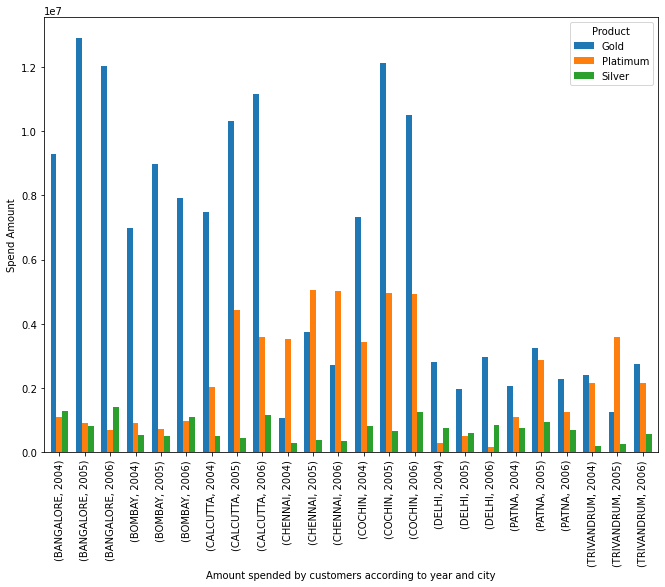

In [327]:
cust_spend_pivot.plot(kind = 'bar', figsize = (11,8), width = 0.7)
plt.xlabel('City Spend as per Year')
plt.ylabel('Spend Amount')
plt.xlabel('Amount spended by customers according to year and city')
plt.show()


# 4. Create graphs for
## a. Monthly comparison of total spends, city wise

In [328]:
cust_spend['Monthly'] = cust_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%b'))

In [329]:
cust_mon = pd.crosstab(index= cust_spend.City, columns= cust_spend.Monthly, values= cust_spend.Amount, aggfunc='sum')

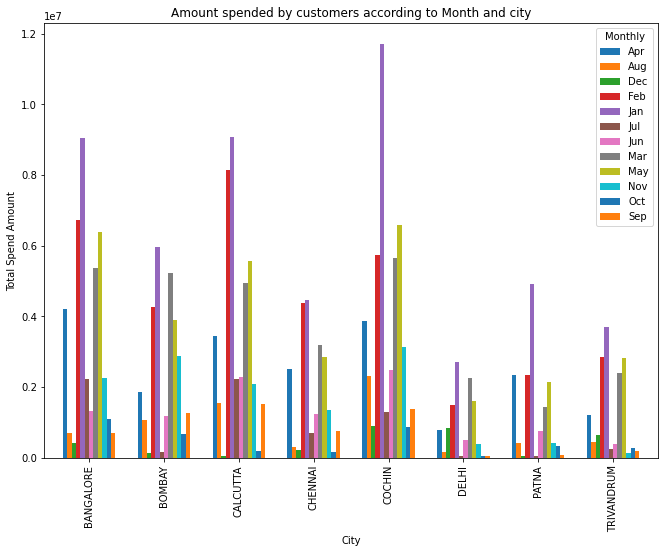

In [330]:
cust_mon.plot(kind = 'bar', figsize = (11,8), width = 0.7)
plt.xlabel('City')
plt.ylabel('Total Spend Amount')
plt.title('Amount spended by customers according to Month and city')
plt.show()

## b. Comparison of yearly spend on air tickets

In [348]:
cust_spend.groupby([cust_spend.Month.dt.year, cust_spend.Type[cust_spend.Type == 'AIR TICKET']])[['Amount']].sum()

,,Amount
Month,Type,
2004,AIR TICKET,4357225.35
2005,AIR TICKET,10550152.21
2006,AIR TICKET,5248469.56


## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [353]:
mon_spn_pdt = cust_spend.pivot_table(index= 'Product', columns= 'Monthly', values= 'Amount', aggfunc= 'sum') 

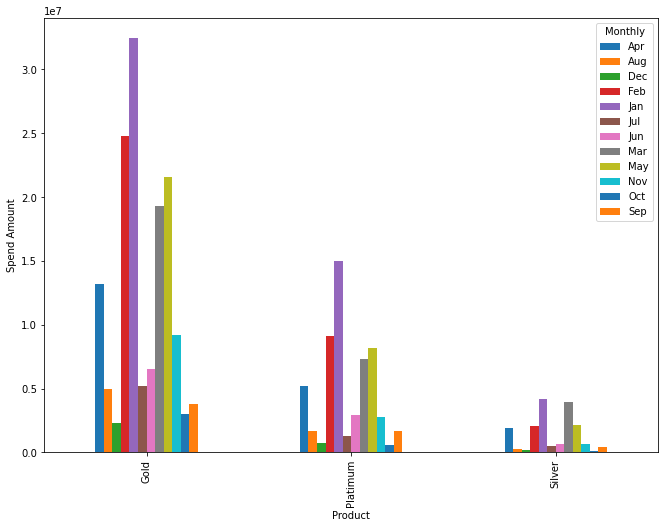

In [357]:
mon_spn_pdt.plot(kind = 'bar', figsize = (11,8))
plt.ylabel('Spend Amount')
plt.show()

In [358]:
print('Amongst all other months, montly spend in January is high')

Amongst all other months, montly spend in January is high


# 5. Write user defined PYTHON function to perform the following analysis:
## You need to find top 10 customers for each city in terms of their repayment amount by
## different products and by different time periods i.e. year or month. The user should be able
## to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
## function should automatically take these inputs while identifying the top 10 customers.

In [371]:
cust_repay.Month = pd.to_datetime(cust_repay.Month)
cust_repay['Monthly'] = cust_repay.Month.apply(lambda x : pd.Timestamp.strftime(x,format = '%B'))
cust_repay['Yearly'] = cust_repay.Month.apply(lambda x : pd.Timestamp.strftime(x,format = '%Y'))

In [448]:
def top10cust(x,y):
    if x.lower()=='gold' and y.lower()=='monthly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:] 
    elif x.lower()=='gold' and y.lower()=='yearly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:] 
    elif x.lower()=='silver' and y.lower()=='monthly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]  
    elif x.lower()=='silver' and y.lower()=='yearly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]  
    elif x.lower()=='platimum' and y.lower()=='monthly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]    
    elif x.lower()=='platimum' and y.lower()=='yearly':
        sum_report = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        res = sum_report.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return res

In [452]:
top10cust('silver','monthly')

Monthly                          April     August   December   February  \
Product City       Customer                                               
Silver  BANGALORE  A18       100000.00  100000.00        NaN   38296.41   
                   A23       405083.59  100001.00        NaN  472921.32   
                   A59        16652.72        NaN        NaN  200006.00   
                   A72             NaN        NaN        NaN  100000.00   
                   A76             NaN        NaN        NaN  265619.05   
                   A77             NaN        NaN        NaN    3159.62   
        COCHIN     A100            NaN        NaN        NaN        NaN   
                   A25       300009.00    1168.46        NaN  236157.25   
                   A7              NaN        NaN  100001.00  100001.00   
                   A74             NaN        NaN        NaN  100002.00   
                   A79             NaN        NaN        NaN        NaN   
        CALCUTTA   A2        200000.00  100000.00        NaN  300000.00   
                   A58       200004.00        NaN        NaN  191585.97   
                   A73             NaN        NaN        NaN  100001.00   
                   A78             NaN        NaN        NaN        NaN   
                   A87             NaN        NaN        NaN        NaN   
        BOMBAY     A22       392140.92  100000.00        NaN  349814.89   
                   A75             NaN        NaN        NaN  100003.00   
                   A80             NaN        NaN        NaN        NaN   
        CHENNAI    A85             NaN        NaN        NaN        NaN   
                   A9         43323.90        NaN        NaN  266926.41   
                   A96             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57       177378.57        NaN  100001.00  200002.00   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   
        PATNA      A46       327793.48        NaN        NaN  544231.79   
                   A8        100002.00        NaN        NaN  300006.00   
                   A84             NaN        NaN        NaN        NaN   
        DELHI      A24       222060.59  100002.00  100002.00  286593.13   
                   A6              NaN        NaN   27398.18  100000.00   

Monthly                        January      July       June      March  \
Product City       Customer                                              
Silver  BANGALORE  A18       391592.71       NaN  200000.00  600000.00   
                   A23       459884.12  100001.0        NaN  100001.00   
                   A59       476551.50  100003.0  110585.36  400012.00   
                   A72             NaN       NaN        NaN        NaN   
                   A76             NaN       NaN        NaN        NaN   
                   A77             NaN       NaN        NaN        NaN   
        COCHIN     A100       69551.19       NaN        NaN        NaN   
                   A25       586332.08  100003.0        NaN  300009.00   
                   A7        594009.28       NaN        NaN  329246.84   
                   A74             NaN       NaN        NaN        NaN   
                   A79             NaN       NaN        NaN  193230.31   
        CALCUTTA   A2        200000.00       NaN        NaN        NaN   
                   A58       333811.62       NaN  100002.00  408754.94   
                   A73             NaN       NaN        NaN        NaN   
                   A78             NaN       NaN        NaN   55344.81   
                   A87             NaN       NaN        NaN  100003.00   
        BOMBAY     A22       900000.00  100000.0  100000.00  253130.91   
                   A75             NaN       NaN        NaN        NaN   
                   A80             NaN       NaN        NaN  481205.64   
        CHENNAI    A85             NaN       